### Anomaly Detection using DBSCAN Clustering

In this notebook, we will demonstrate the use of the DBSCAN clustering algorithm for anomaly detection in sensor data.
We will use synthetic data representing normal and anomalous sensor readings to identify outliers.


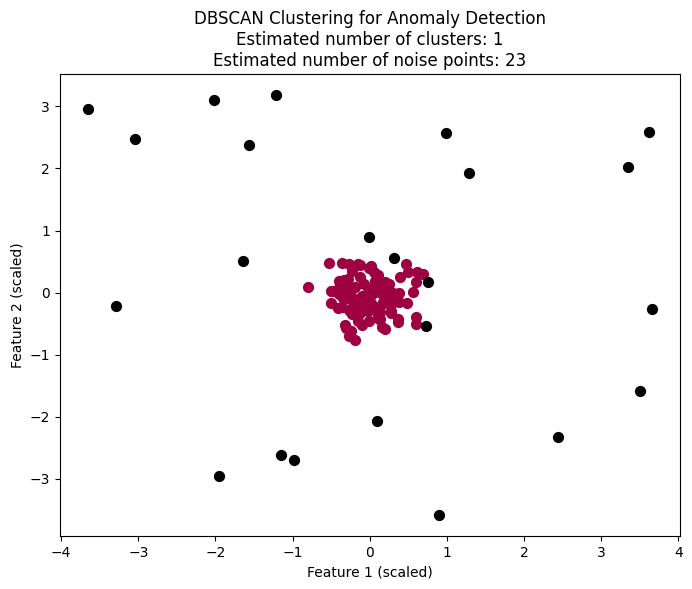

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Örnek veri oluşturma
np.random.seed(0)
normal_data = np.random.normal(0, 0.5, (100, 2))
anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
data = np.vstack((normal_data, anomalies))

# DBSCAN algoritmasını uygulama
scaler_real = StandardScaler()
data_scaled = scaler_real.fit_transform(data)

db_real = DBSCAN(eps=0.3, min_samples=10).fit(data_scaled)
labels_real = db_real.labels_

# Küme sayısını belirleme
n_clusters_real = len(set(labels_real)) - (1 if -1 in labels_real else 0)
n_noise_real = list(labels_real).count(-1)

# Kümeleme sonuçlarını görselleştirme
unique_labels_real = set(labels_real)
colors_real = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_real))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels_real, colors_real):
    if k == -1:
        col = [0, 0, 0, 1]  # Siyah olarak renklendir (gürültü)

    class_member_mask = (labels_real == k)
    xy = data_scaled[class_member_mask & (labels_real == k)]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50)

plt.title(f"DBSCAN Clustering for Anomaly Detection\nEstimated number of clusters: {n_clusters_real}\nEstimated number of noise points: {n_noise_real}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
